In [69]:
from new_basis_llp_qaoa.statevector_sim.statevector_llp import StateVectorLLP


In [70]:
import numpy as np
ASList = np.load("../../../resource/sample_matrices/AS-Copy1.npy")
QSList = np.load("../../../resource/sample_matrices/QS-Copy1.npy")
AS = ASList[0]
QS = QSList[0]


def generate_random_dataset(M, N, strength=0.2):
    As = np.zeros((N,N))
    for i in range(N):
        for j in range(i):
            x = np.random.random()
            while x > strength:
                x = np.random.random()
            As[i][j] = x
            As[j][i] = x

    Qs = np.zeros((N,M))
    expected_returns = np.linspace(1/M, 1, M)[:: -1]*(1/M)
    Vs = As.sum(axis=1)
    for i in range(N):
        np.random.shuffle(expected_returns)
        Qs[i, :] = Vs[i] * expected_returns
    return As, Qs
np.random.seed(42)
As, Qs = generate_random_dataset(3,2)

In [71]:
state = "ones"
svllp = StateVectorLLP(Qs, As, 1/20, state)

In [72]:
n = svllp.qubits_number
svllp.current_state = np.ones(2**n)/np.sqrt(2**n)

In [73]:
from new_basis_llp_qaoa.qaoa.parameters import Parameters
from time import time


In [74]:
start = time()
p = 1
res = svllp.run_optimizer(p)

(-0.05303576323837082+2.168404344971009e-18j)
(-0.053035763258137705+0j)
(-0.053035763227091665-2.168404344971009e-18j)
(-0.05303809565648586-4.336808689942018e-19j)
(-0.05303809567626271-3.0357660829594124e-18j)
(-0.053038095645232874+8.673617379884035e-19j)
(-0.05304742050234746-8.673617379884035e-19j)
(-0.053047420522161264+8.673617379884035e-19j)
(-0.053047420491199565-1.734723475976807e-18j)
(-0.05308460912639737+2.6020852139652106e-18j)
(-0.05308460914630829-4.336808689942018e-19j)
(-0.05308460911567457+2.168404344971009e-18j)
(-0.053229676388455445-1.3010426069826053e-18j)
(-0.053229676408055246-1.3010426069826053e-18j)
(-0.05322967637948395+4.336808689942018e-19j)
(-0.053685570595642294-8.673617379884035e-19j)
(-0.05368557060947743-1.3010426069826053e-18j)
(-0.05368557059346741-4.336808689942018e-19j)
(-0.0540516280640535-1.734723475976807e-18j)
(-0.05405162807221241+4.336808689942018e-19j)
(-0.05405162807383808-8.673617379884035e-19j)
(-0.05405926957909117-4.336808689942018e-1

In [75]:
time() - start

0.3135800361633301

In [76]:
params = res.x
betas = params[:p]
gammas = params[p:]
params = Parameters(
    gamma_list=gammas,
    beta_list=betas
)
svllp.evolve(params)

In [77]:
svllp.get_energy(), svllp.get_energy2()

((-0.08346055727755103+2.2768245622195593e-18j), -0.08346055727755107)

In [78]:
# svllp.ha.diagonal()

In [79]:
prob = svllp.probabilities
sum(prob)

1.0000000000000009

In [80]:
top_3 = sorted([(j,i) for i,j in enumerate(svllp.ha.diagonal())])[:3]
top_3 = [j for _,j in top_3]
top_1 = top_3[0]
top_3

[1, 5, 0]

Text(0.5, 0, 'state')

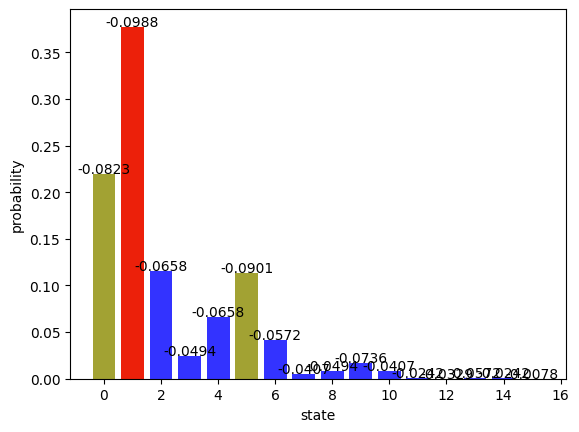

In [81]:
from matplotlib import pyplot as plt
plt.bar(x=range(2**svllp.qubits_number),height=prob, color='b', alpha=0.8)
plt.bar(x=top_3, height=prob[top_3], color='y', alpha=0.8)
plt.bar(x=top_1, height=prob[top_1], color='r', alpha=0.8)
for y, vals in zip(prob, enumerate(svllp.ha.diagonal())):
    x, energy = vals
    plt.text(x= x, y = y+0.001, s= f"{energy}"[:7], horizontalalignment= 'center')
plt.ylabel("probability")
plt.xlabel("state")
